# **$$Stroke~ Prediction$$**
***

## *__Problem Statement:__*

__A Predictive Analysis approach to predict `Stroke` using various `Machine Learning Algorithm` and Using `Artificial Neural Networks`.__

***
## *$$Importing~ Libraries$$*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

***
## *$$Importing~ Dataset$$*

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

## *$$About~ Dataset$$*

_**According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.**_

- **id**                 - Unique Identifier.
- **gender**             - Gender of the Patient. (*Male, Female or Other*)
- **age**                - Age of the Patient in Years.
- **hypertension**       - Hypertension is when blood pressure is too high.(boolean)
                        1 = If the patient have hypertension.
                        0 = If the patient doesn't have hypertension.
- **heart_disease**      - Patient has some heart related problem.(boolean)
                        1 = If the patient have any heart diseases.
                        0 = If the patient doesn't have any heart diseases.
- **ever_married**       - Patient has ever married or not.("Yes" or "No")
- **work_type**          - What kind of work does the patient do.
                        * Private.
                        * Govt_job.
                        * Self-employed.
                        * Never_worked.
                        * children.
- **Residence_type**     - What type of residential surroundings the patient lives in.
                        * Rural.
                        * Urban.
- **avg_glucose_level**  - Level of glucose in the blood of the patient.(mg/dL)
- **bmi**                - Body Mass Index.
- **smoking_status**     - What is the patient smoking habit.
                        * formerly smoked.
                        * never smoked.
                        * smokes.
                        * Unknown.
- **Stroke**             - If the patient had a stroke or not.(boolean)
                        1 = Patient had stroke.
                        0 = Patient didn't had stroke.

In [3]:
df.head(5)

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

***
## *$$Data~Cleaning$$*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

* **Since no null values are there in each column except bmi column which is a continuous variable, therefore null values in bmi will be treated.**
* **Since we know that the bmi of a person depends on there height and weight but these two information is not given in the dataset, we also know that bmi is also dependent on gender, age thus we can use them to solve the problem of null value in bmi.**
* **Since gender being categorical value and bmi being continuous variable we need to plot box plot to see how the bmi is related to gender.**
* **Since age and bmi both are continuous variables so it is better to see their relationship using scatter plot.**

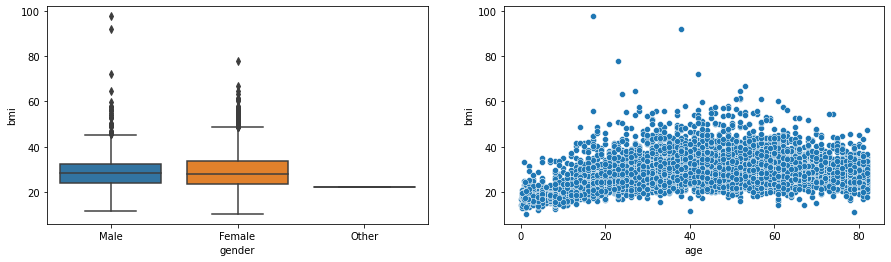

In [6]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x=df.gender,y=df.bmi)
plt.subplot(1,2,2)
sns.scatterplot(x=df.age,y=df.bmi)
plt.savefig('scatterplot_age_bmi')

* **We cannot make much difference in bmi for male and female from boxplot.**
* **From the scatter plot we can see that if we make some group among ages than we will be able to see different mean values of bmi (as it should be, since bmi range of adult is different than a child or a teen or a senior citizen).**
* **So we need to group those ages and then see whether can we figure out any values for bmi to be used inplace of null values.**
    * Age Group will be divided as:
        - Age <= 5 : Child
        - 5 < Age < 18 : Teen
        - 18 <= Age < 60: Adult
        - Age > 60 : Senior_Citizen

In [7]:
ag = []
for i in df.age:
    if i <= 5.0:
        ag.append("Child")
    elif i > 5.0 and i < 18.0:
        ag.append("Teen")
    elif i >= 18.0 and i < 60.0:
        ag.append("Adult")
    else:
        ag.append("Senior Citizen")
df['Age_Group'] = ag
df.head(5)

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke       Age_Group  
0       1  Senior Citizen  
1       1  Senior Citizen  
2       1  Senior Citizen  
3       1           Adult  
4       1  Senior Citizen

<AxesSubplot:xlabel='Age_Group', ylabel='bmi'>

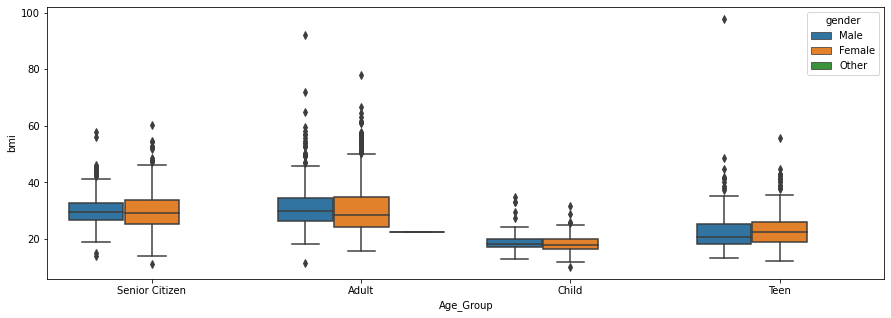

In [8]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df.Age_Group,y=df.bmi,hue = df.gender)

In [9]:
ag_g = df.groupby('Age_Group')
a = ag_g.bmi.mean()
a

Age_Group
Adult             30.646341
Child             18.659164
Senior Citizen    29.969339
Teen              23.012000
Name: bmi, dtype: float64

In [10]:
b = ()
for i in a:
    b = b+(i,)
Adult_m,Child_m,Senior_Citizen_m,Teen_m = b
print(Adult_m,Child_m,Senior_Citizen_m,Teen_m)

30.646341463414632 18.659163987138264 29.969338521400775 23.011999999999997


In [11]:
def impute_bmi(cols):
    bmi = cols[0]
    Age_Group = cols[1]
    if pd.isnull(bmi):
        if Age_Group == 'Senior Citizen':
                return Senior_Citizen_m
        elif Age_Group == 'Adult':
            return Adult_m
        elif Age_Group == 'Teen':
            return Teen_m
        elif Age_Group == 'Child':
            return Child_m
    else:
        return bmi
df['bmi']=df[['bmi','Age_Group']].apply(impute_bmi,axis=1)
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level        bmi  \
0        Private          Urban             228.69  36.600000   
1  Self-employed          Rural             202.21  29.969339   
2        Private          Rural             105.92  32.500000   
3        Private          Urban             171.23  34.400000   
4  Self-employed          Rural             174.12  24.000000   

    smoking_status  stroke       Age_Group  
0  formerly smoked       1  Senior Citizen  
1     never smoked       1  Senior Citizen  
2     never smoked       1  Senior Citizen  
3           smokes       1           Adult  
4     never smoked       1  Senior Citizen

In [12]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
Age_Group            0
dtype: int64

**As we can see from above result that all the null values have been taken care off.**
***

In [13]:
df.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  5110.000000  5110.000000  
mean          106.147677    28.912592     0.048728  
std            45.283560     7.719640     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.700000     0.000000  
50%            91.885000    28.300000     0.000000  
75%           114.090000    32.800000     0.000000  
max           271.740000    97.600000     1.000000

* **As some of the ages are not in whole number thus approximating the age value to nearest whole number (we can see min to be 0.08).**
#### Approximating Age column:

In [14]:
df['age'] = df['age'].apply(np.ceil)

In [15]:
df.head(165) # row 162 was such an example

id  gender   age  hypertension  heart_disease ever_married  \
0     9046    Male  67.0             0              1          Yes   
1    51676  Female  61.0             0              0          Yes   
2    31112    Male  80.0             0              1          Yes   
3    60182  Female  49.0             0              0          Yes   
4     1665  Female  79.0             1              0          Yes   
..     ...     ...   ...           ...            ...          ...   
160  50931  Female  76.0             0              0          Yes   
161  16590    Male  71.0             0              1          Yes   
162  69768  Female   2.0             0              0           No   
163  20426  Female  78.0             1              0           No   
164   3512  Female  70.0             1              0          Yes   

         work_type Residence_type  avg_glucose_level        bmi  \
0          Private          Urban             228.69  36.600000   
1    Self-employed          Rural             202.21  29.969339   
2          Private          Rural             105.92  32.500000   
3          Private          Urban             171.23  34.400000   
4    Self-employed          Rural             174.12  24.000000   
..             ...            ...                ...        ...   
160        Private          Urban              57.92  29.969339   
161        Private          Urban              81.76  29.969339   
162       children          Urban              70.37  18.659164   
163        Private          Urban             203.87  45.700000   
164  Self-employed          Urban              89.13  34.200000   

      smoking_status  stroke       Age_Group  
0    formerly smoked       1  Senior Citizen  
1       never smoked       1  Senior Citizen  
2       never smoked       1  Senior Citizen  
3             smokes       1           Adult  
4       never smoked       1  Senior Citizen  
..               ...     ...             ...  
160  formerly smoked       1  Senior Citizen  
161           smokes       1  Senior Citizen  
162          Unknown       1           Child  
163     never smoked       1  Senior Citizen  
164  formerly smoked       1  Senior Citizen  

[165 rows x 13 columns]

##### Since there is one data where gender is given other so deleting that row.

In [16]:
df[df.gender == 'Other']

id gender   age  hypertension  heart_disease ever_married work_type  \
3116  56156  Other  26.0             0              0           No   Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  \
3116          Rural             143.33  22.4  formerly smoked       0   

     Age_Group  
3116     Adult

In [17]:
df.drop(df[df.gender == 'Other'].index,inplace=True)

df.gender.value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

## *$$Insights$$*
- **Continuous Variables:** 
    - age
    - avg_glucose_level
    - bmi

- **Categorical Variable:**
    - gender
    - hypertension
    - heart_disease
    - ever_married
    - work_type
    - Residence_type
    - smoking_status
    - stroke
    - Age_Group

 ***
# *$$Explorartory~ Data~ Analytics$$*

In [18]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'Age_Group'],
      dtype='object')

**$Spliting~ the~ columns~ into~ two~ separate~ list$**

In [19]:
continuous = ['age','avg_glucose_level', 'bmi']
categorical = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status','Age_Group','stroke']

**To understand more about these columns we need to plot some graphs, as we know that continuous variable are best understood by box plot and categorical variables are best represented by count plots, so ploting them:**

# **$$Continuous~ Variables$$**
## **$$Box~ Plot$$**

<AxesSubplot:xlabel='bmi'>

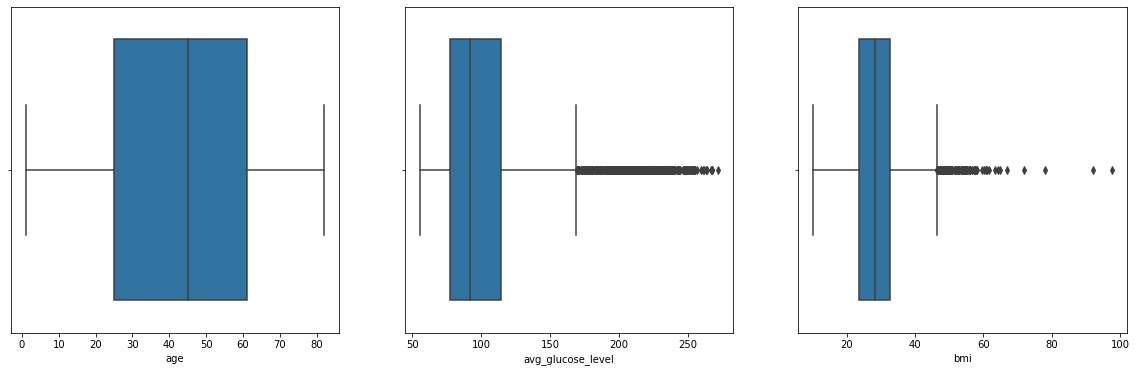

In [20]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.boxplot(x=df.age)
plt.subplot(1,3,2)
sns.boxplot(x=df.avg_glucose_level)
plt.subplot(1,3,3)
sns.boxplot(x=df.bmi)


## *$$Insights$$*

- age - In the dataset we have seen that the age is varying from almost a year old toddler to 82 years old senior citizen, also this variable has no outliers.
- avg_glucose_level - In the dataset we have seen that the average glucose level a patient has is mostly around the range 55 mg/dL to almost around 170 mg/dL having so many outliers but we will consider those outliers as glucose level has wide range with respect to people having diabetes.
- bmi - In the dataset we have seen that the majority of patient have bmi around 10 to almost around 45 having large amount of outliers and we need to treat them.

***
## **$$Categorical~ Variables$$**

**Value Counts:**

In [21]:
for i in categorical:
    print(" "*5+f"{i.upper()}"+" "*5)
    print(df[i].value_counts())
    print("-"*40)

     GENDER     
Female    2994
Male      2115
Name: gender, dtype: int64
----------------------------------------
     HYPERTENSION     
0    4611
1     498
Name: hypertension, dtype: int64
----------------------------------------
     HEART_DISEASE     
0    4833
1     276
Name: heart_disease, dtype: int64
----------------------------------------
     EVER_MARRIED     
Yes    3353
No     1756
Name: ever_married, dtype: int64
----------------------------------------
     WORK_TYPE     
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
----------------------------------------
     RESIDENCE_TYPE     
Urban    2596
Rural    2513
Name: Residence_type, dtype: int64
----------------------------------------
     SMOKING_STATUS     
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64
----------------------------------------
 

## *$$Count~ Plot$$*

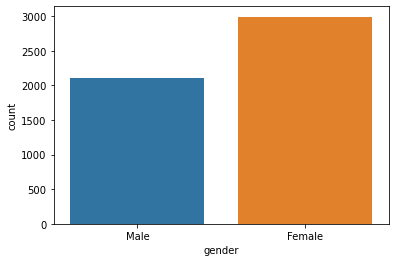

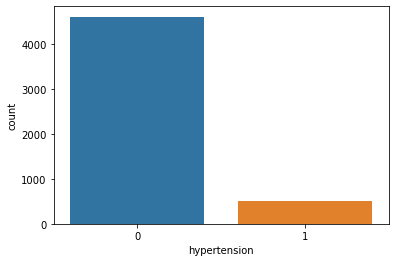

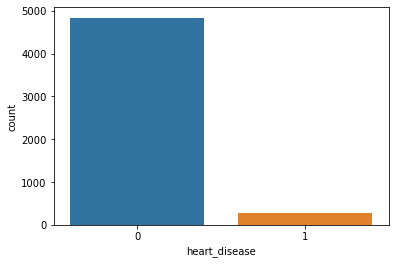

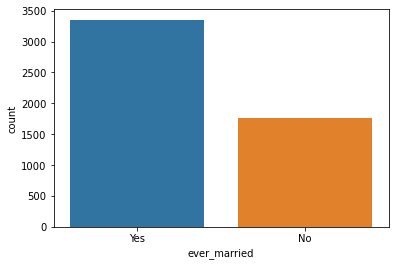

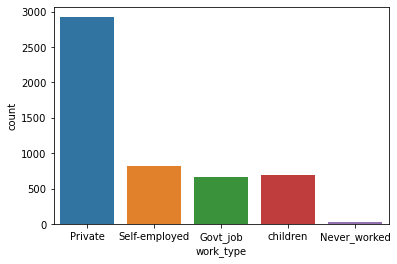

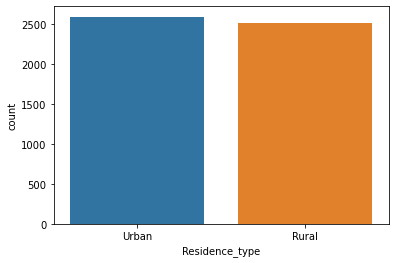

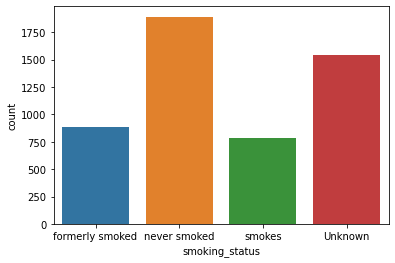

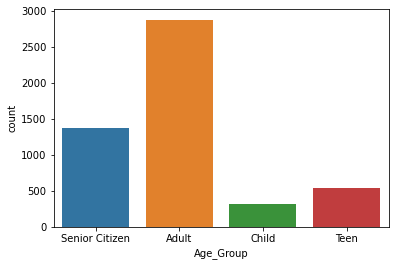

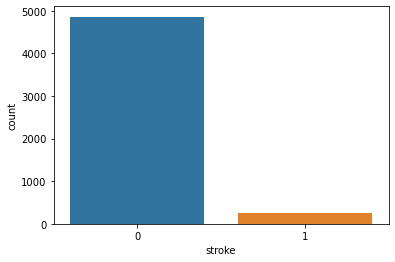

In [22]:
for i in categorical:
    sns.countplot(df[i])
    plt.savefig(f'{i}')
    plt.show()

## *$$Insights$$*
- gender - In the dataset we have seen that female patients are more in comparison to male patients.
- hypertension - From the count plot of hypertension we can say that the patient who does not have hypertension are more than the number of patient who does have hypertension.
- heart_disease - The number of patient who does not have heart disease are more than the number of patient who does have heart disease in the dataset.
- ever_married - The number of patient who have been maaried or are married are more than the number of patient those who are never married.
- work_type - This dataset contains variety of work type of patients which are private, self-employed means patients are either having their own business or are free-lancers, some are goverment employees, some have never worked and some are children. The dataset clearly indicates that the people working in the private sector are more than any other work type included in the dataset.
- Residence_type - Patients in this dataset are havinig their living surroundings as rural and urban, and it can be seen from the plot that although there is clear indication in the graph that patients are more in case of Urban residential type but it seems that both the types of residential surroundings are having similar number of patients.  
- smoking - This dataset have patient with different smoking habits or some are non smokers and in some cases their status is unknown. Since their are more patient who haven't disclosed there smoking status we can't say much about it but if we exclude these patients then we see that the patients those who don't smoke are more than the patients who smokes or formerly smokes.
- Age_Group - This is the column tells us about how many patients belongs to which group, i.e whether they are children, teenager, adult, or senior citizen. From the plot we can see that the dataset has more number of Adult patients than senior citizens, and there are some teenager and children as patients.
- Stroke - The number of patient who did not have had Stroke are much more than the number of patients who did had Stroke.
- We can see that there is problem of class imbalance in the Stroke feature which is our prediction variable, thus we will be required to treat class imbalance problem. Class imbalance problem can be treated by two ways by oversampling or by undersampling. We will take both the case during our prediction as compare result using prediction parameters.

***
## *$$Pie~ Plot$$*

<AxesSubplot:ylabel='stroke'>

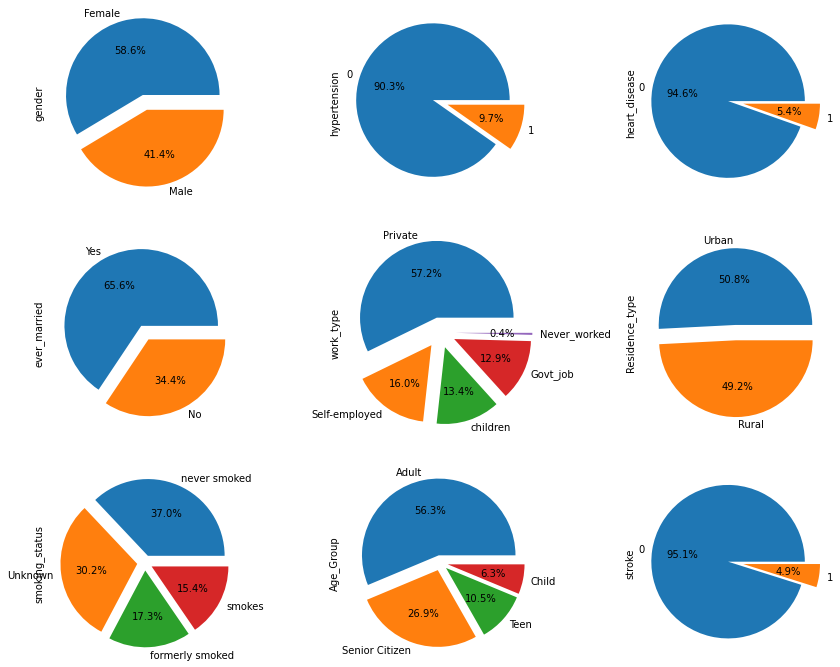

In [23]:
plt.figure(figsize=(15,12))
plt.subplot(3,3,1)
df.gender.value_counts().plot.pie(autopct = '%1.1f%%',explode=[0.1,0.1])
plt.subplot(3,3,2)
df.hypertension.value_counts().plot.pie(autopct = '%1.1f%%',explode=[0.1,0.1])
plt.subplot(3,3,3)
df.heart_disease.value_counts().plot.pie(autopct = '%1.1f%%',explode=[0.1,0.1])
plt.subplot(3,3,4)
df.ever_married.value_counts().plot.pie(autopct = '%1.1f%%',explode=[0.1,0.1])
plt.subplot(3,3,5)
df.work_type.value_counts().plot.pie(autopct = '%1.1f%%',explode=[0.2,0.2,0.2,0.2,0.2])
plt.subplot(3,3,6)
df.Residence_type.value_counts().plot.pie(autopct = '%1.1f%%',explode=[0.1,0.1])
plt.subplot(3,3,7)
df.smoking_status.value_counts().plot.pie(autopct = '%1.1f%%',explode=[0.1,0.1,0.1,0.1])
plt.subplot(3,3,8)
df.Age_Group.value_counts().plot.pie(autopct = '%1.1f%%',explode=[0.1,0.1,0.1,0.1])
plt.subplot(3,3,9)
df.stroke.value_counts().plot.pie(autopct = '%1.1f%%',explode=[0.1,0.1])

* Pie plot is also the representation used for categorical variables, instead of giving a count value it gives the percentage value of total value, i.e from above we can see that female are almost 59% in the dataset where as males are 41% of the total patients.
* Patients those who are not having hypertension and heart disease are more which can be clearly seen in the pie plot of both.
* There are 66% of Patients those who are married and there are 57% of the total patients those who are working in private industry.
* As inferred earlier there seems to almost equal number of patients living in either rular or in urban area which can be seen in the pie plot of Residence type.
* As inferred earlier there is a huge imbalance in data in case of stroke as patients had no stroke are almost 95% and patients had stroke are almlost only 5% which is the problem of imbalance which we need to tackle.

***
## *$$Treating~ Outliers$$*

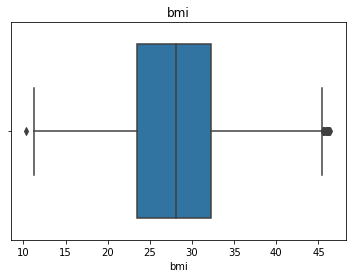

In [24]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['bmi']<(Q1-1.5*IQR))|(df['bmi']>(Q3+1.5*IQR)))]
plt.title('bmi')
sns.boxplot(df['bmi'])
plt.show()

**Using IQR method we have removed the outliers. If in case some outliers are still present according to boxplot, they are to be treated as data points not as outliers.**
***

## *$$Pair~Plot$$*

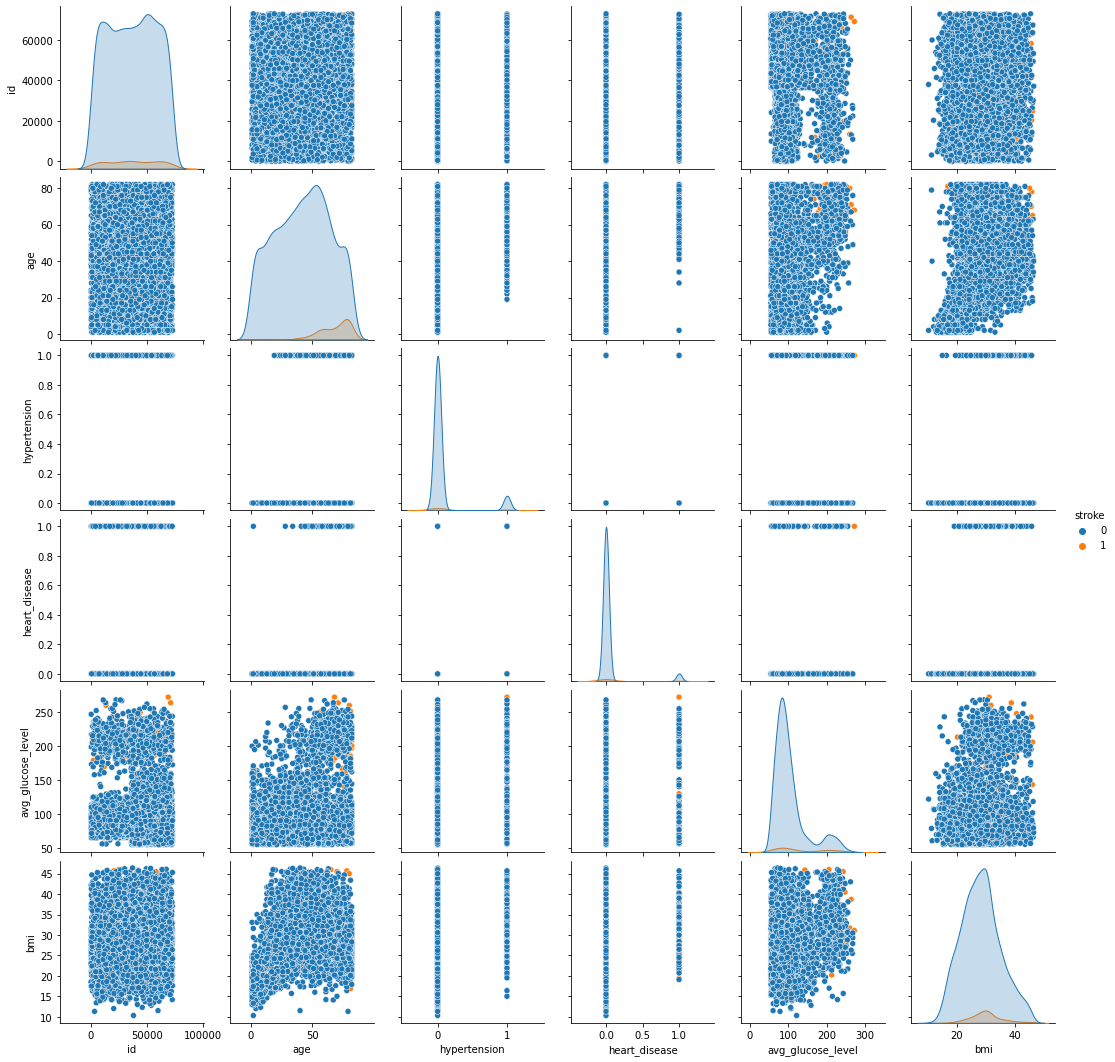

In [25]:
sns.pairplot(df,hue='stroke')
plt.savefig('pairplot')
plt.show()

## *$$Heat~Map$$*

**Defiining Correlation between each features:**

In [26]:
df.corr()

id       age  hypertension  heart_disease  \
id                 1.000000  0.004598      0.005042      -0.003020   
age                0.004598  1.000000      0.279454       0.265721   
hypertension       0.005042  0.279454      1.000000       0.112583   
heart_disease     -0.003020  0.265721      0.112583       1.000000   
avg_glucose_level  0.007908  0.235311      0.171044       0.168939   
bmi                0.016565  0.389695      0.161534       0.068524   
stroke             0.007206  0.246856      0.130553       0.135624   

                   avg_glucose_level       bmi    stroke  
id                          0.007908  0.016565  0.007206  
age                         0.235311  0.389695  0.246856  
hypertension                0.171044  0.161534  0.130553  
heart_disease               0.168939  0.068524  0.135624  
avg_glucose_level           1.000000  0.174764  0.130571  
bmi                         0.174764  1.000000  0.061690  
stroke                      0.130571  0.061690  1.000000

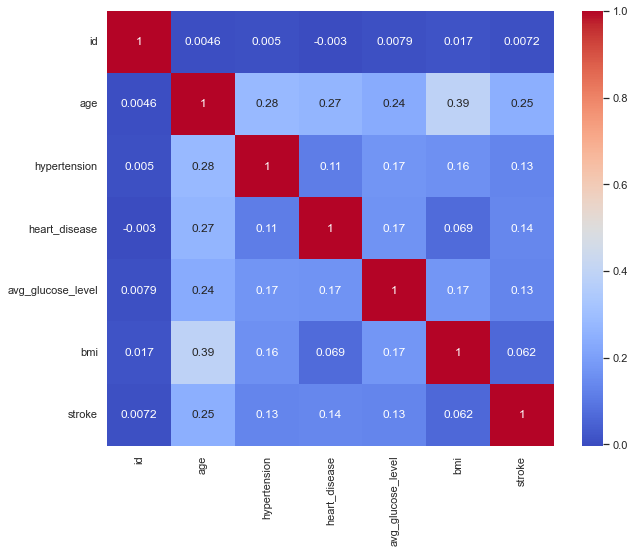

In [27]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(df.corr(),cmap = 'coolwarm',annot = True)
plt.savefig('heatmap')
plt.show()

## *$$Insights$$*

- From the correlation function and heatmap we can see there is not much correlation between variables. Stroke has highest positive correlation with age (0.25) and has a positive correlation with heart_disease(0.14), hypertension (0.13), avg_glucose_level (0.13). And almost neglible correlation with bmi (0.062).

- Some continuous data which are having some correlation between each other-
    - age and bmi (0.39)
    - age and avg_glucose_level (0.24)

we will plot scatterplot to know more about there relationship.

- Some categorical data are having correlation with some continuous data-
    - stroke and age (0.25)
    - stroke and avg_glucose_level (0.13)
    - hypertension and age (0.28)
    - heart_disease and age (0.27)

we will plot histogram to understand more about there relationship.

- Some categorical data which are having some correlation between each other-
    - stroke and heart_disease (0.14)
    - stroke and hypertension (0.13)

we will plot countplot to understand more about there relationship.
***

### Continous V/s Continuous Data:

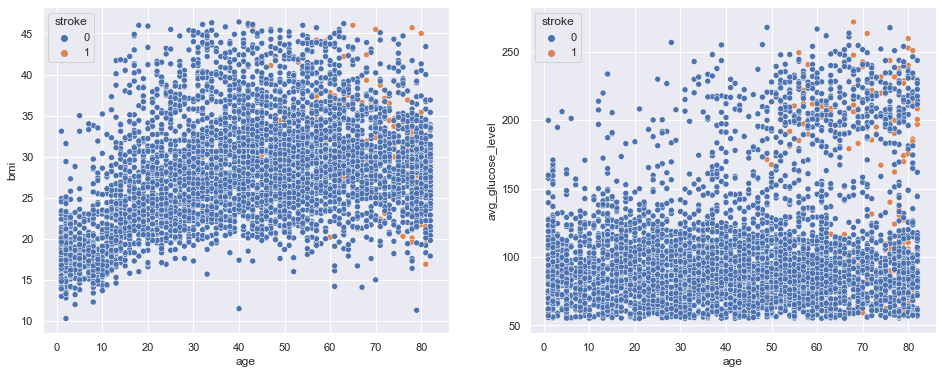

In [28]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.scatterplot(data=df,x='age',y='bmi',hue='stroke')
plt.plot()
plt.grid(True)
plt.subplot(1,2,2)
sns.scatterplot(data=df,x='age',y='avg_glucose_level',hue='stroke')
plt.plot()
plt.grid(True)
plt.savefig('cont_vs_cont_variable')

## *$$Insights$$*
- Patient having age more than 30 are having average bmi level of 30 whereas patient having age less than 30 are having average bmi level of 23. Also, most of the patient those who had stroke are having age greater than 50 and bmi level more than 30.
- Patient having age more than 40 are having average glucose level of 114 mg/dL whereas patient having age less than 40 are having average glucose level of 95 mg/dL, but it can be seen in the scatter plot that from the age of 40 the average glucose level fluctuates the most and which is not good for health. Also, patient who had stroke are having age greater than 50 and average glucose level greater than 150 mg/dL.

***
### Categorical V/S Continuous Data:

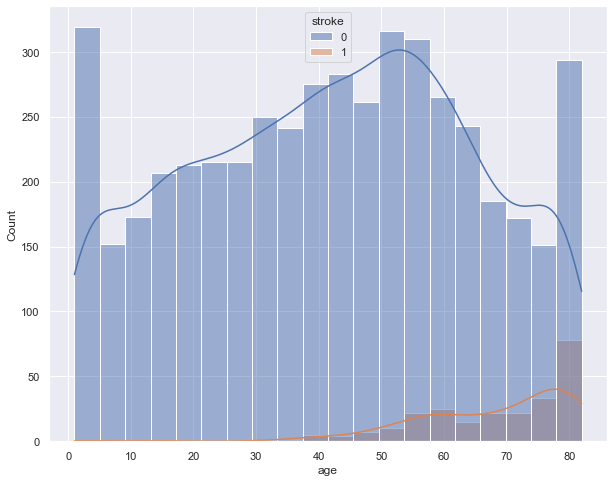

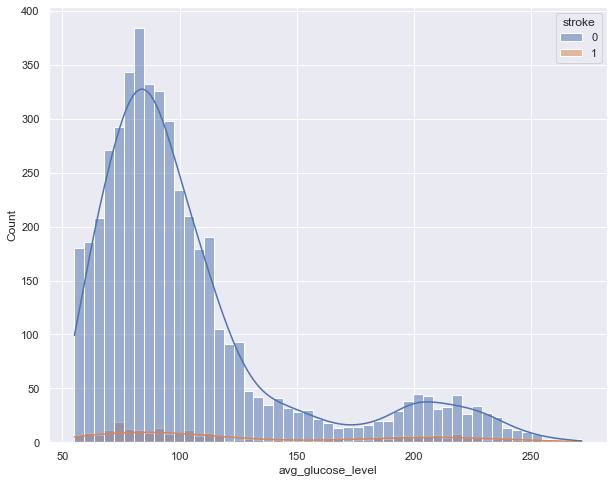

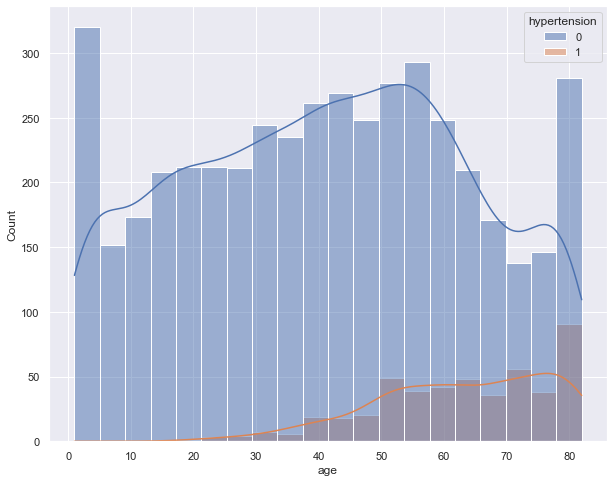

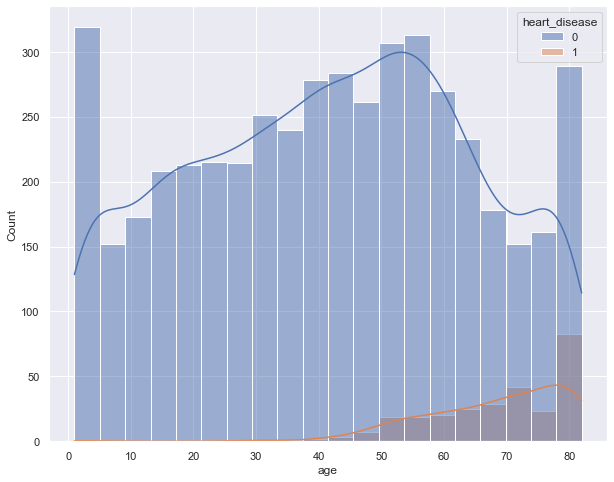

In [29]:
sns.histplot(data=df,x='age',hue='stroke',alpha = 0.5,kde = True)
plt.savefig('age_vs_stroke')
plt.show()

sns.histplot(data=df,x='avg_glucose_level',hue='stroke',alpha = 0.5,kde = True)
plt.savefig('avg_glucose_Vs_stroke')
plt.show()

sns.histplot(data=df,x='age',hue='hypertension',alpha = 0.5,kde = True)
plt.savefig('age_Vs_hypertension')
plt.show()

sns.histplot(data=df,x='age',hue='heart_disease',alpha = 0.5,kde = True)
plt.savefig('age_Vs_heart_disease')
plt.show()

## *$$Insights$$*
- If patient had stroke then the patients age is most likely to be greater than 40 yrs.
- There are more patient between age of 18 yrs to 60 yrs than the patient having age more than 60 yrs.
- Most patient having no stroke are having there average glucose level lesser than 105 md/dL. And for the patient who had stroke, their average glucose level is around 131 mg/dL.
- Most patient those who are having problem of hypertension are mostly having age greater than 40 with average age of 62, whereas patient those who are not having problem of hypertension are mostly younger people.
- Most patient those who are having problem related to heart are mostly having age greater than 45 with average age of 68, whereas patient those who are not having problem related to heart are mostly younger people.

***
### Categorical V/S Categorical:

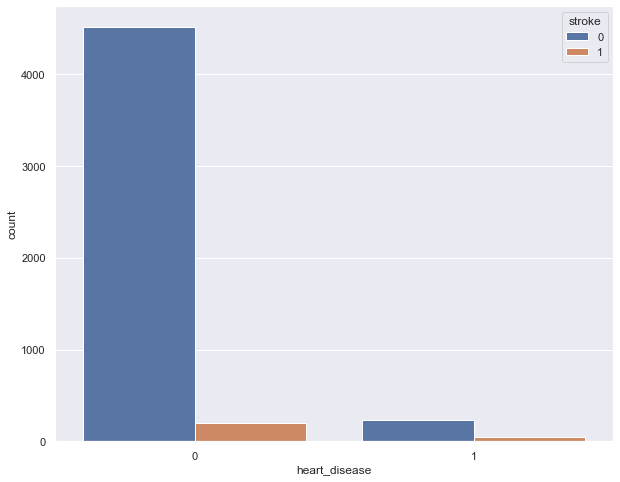

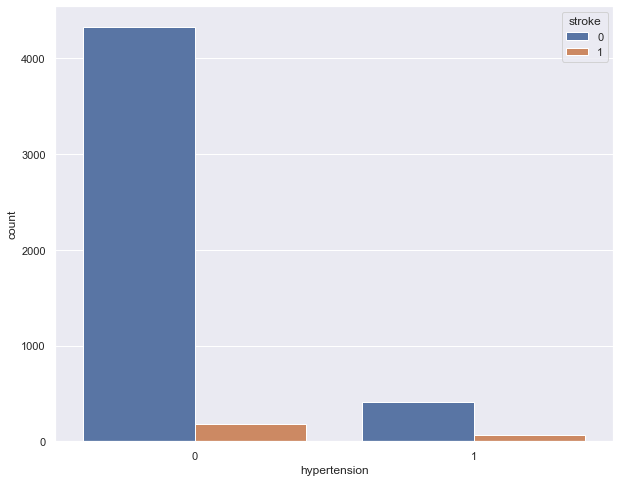

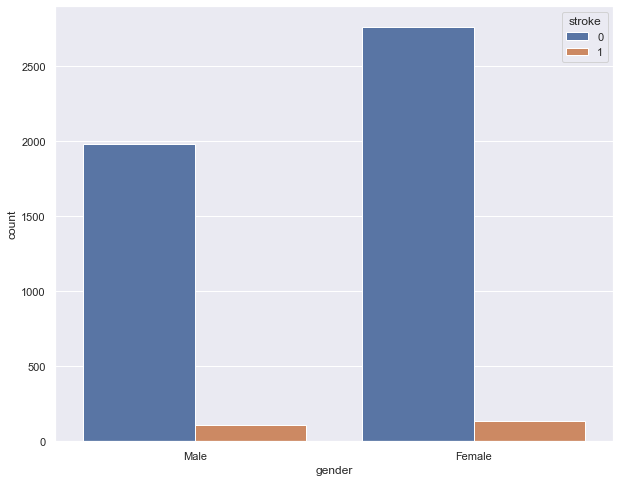

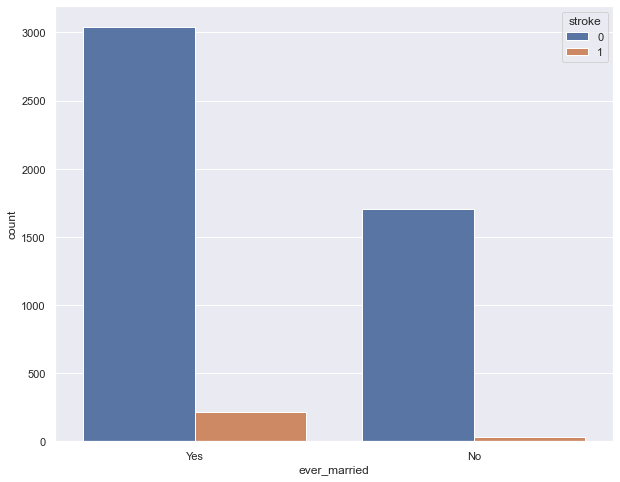

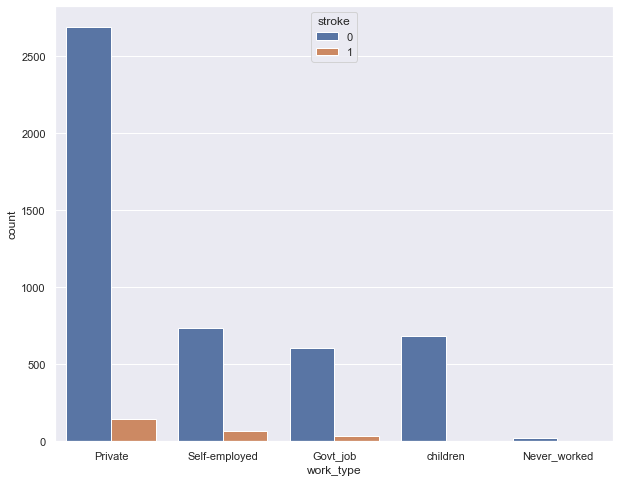

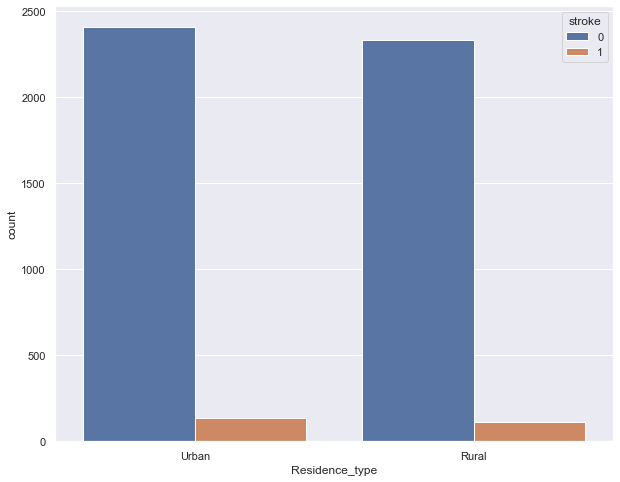

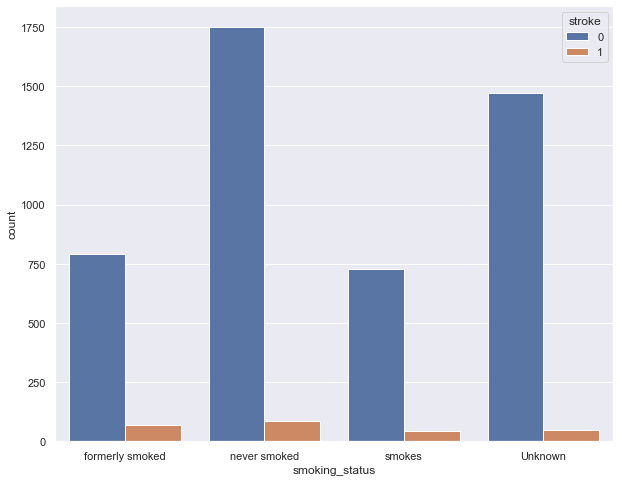

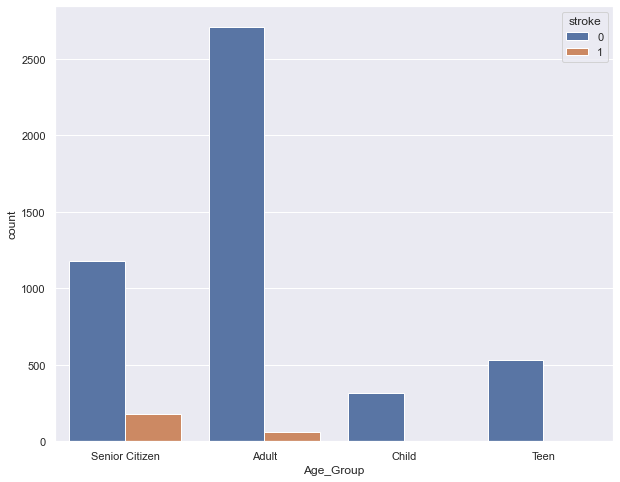

In [30]:
sns.countplot(data=df, x='heart_disease',hue= 'stroke')
plt.savefig('heart_disease_vs_stroke')
plt.show()

sns.countplot(data=df, x='hypertension', hue='stroke')
plt.savefig('hypertension_vs_stroke')
plt.show()

sns.countplot(data=df, x='gender', hue='stroke')
plt.savefig('gender_Vs_stroke')
plt.show()

sns.countplot(data=df, x='ever_married', hue='stroke')
plt.savefig('everMarried_stroke')
plt.show()

sns.countplot(data=df, x='work_type', hue='stroke')
plt.savefig('work_type_Vs_stroke')
plt.show()

sns.countplot(data=df, x='Residence_type', hue='stroke')
plt.savefig('residence_type_Vs_stroke')
plt.show()

sns.countplot(data=df, x='smoking_status', hue='stroke')
plt.savefig('smoking_status_Vs_stroke')
plt.show()

sns.countplot(data=df, x='Age_Group', hue='stroke')
plt.savefig('age_group_Vs_stroke')
plt.show()

## *$$Insights$$*
- People who are not having heart disease are less likely to have had storke.
- People who are not having the problem of hypertension are less likely to have had Stroke.
- There are more Female patient than male patient those who haven't had stroke, but we can't say much about for the case if stroke.
- In case the patient had stroke there is very high chances that the person is married or were married.
- In case the patient had stroke there is very high chances that the person is a private sector employee.
- We can't say much about the effect of Resience type but if we go through it properly than there are more number of patient in Urban area who had stroke than patient of rural area.
- The number of patient are more in case of no stroke and they are non smokers.
- There are more Senior Citizen who have had stroke than the adults.
***

***


# **$$Feature~Engineering$$**

In [31]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level        bmi  \
0        Private          Urban             228.69  36.600000   
1  Self-employed          Rural             202.21  29.969339   
2        Private          Rural             105.92  32.500000   
3        Private          Urban             171.23  34.400000   
4  Self-employed          Rural             174.12  24.000000   

    smoking_status  stroke       Age_Group  
0  formerly smoked       1  Senior Citizen  
1     never smoked       1  Senior Citizen  
2     never smoked       1  Senior Citizen  
3           smokes       1           Adult  
4     never smoked       1  Senior Citizen

In [32]:
df=df.drop(['id','Age_Group'],axis=1)
df.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level        bmi   smoking_status  stroke  
0          Urban             228.69  36.600000  formerly smoked       1  
1          Rural             202.21  29.969339     never smoked       1  
2          Rural             105.92  32.500000     never smoked       1  
3          Urban             171.23  34.400000           smokes       1  
4          Rural             174.12  24.000000     never smoked       1

In [33]:
categorical_drop = []
for i in categorical:
    if i != 'hypertension' and i != 'heart_disease' and i != 'Age_Group':
        categorical_drop.append(i)
categorical_drop

['gender',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'stroke']

In [34]:
categorical_drop.pop()
df_enc=pd.get_dummies(df[categorical_drop],drop_first=True)
df_enc.head()

gender_Male  ever_married_Yes  work_type_Never_worked  work_type_Private  \
0            1                 1                       0                  1   
1            0                 1                       0                  0   
2            1                 1                       0                  1   
3            0                 1                       0                  1   
4            0                 1                       0                  0   

   work_type_Self-employed  work_type_children  Residence_type_Urban  \
0                        0                   0                     1   
1                        1                   0                     0   
2                        0                   0                     0   
3                        0                   0                     1   
4                        1                   0                     0   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                               1                            0   
1                               0                            1   
2                               0                            1   
3                               0                            0   
4                               0                            1   

   smoking_status_smokes  
0                      0  
1                      0  
2                      0  
3                      1  
4                      0

In [35]:
df[df_enc.columns]=df_enc
df.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level        bmi   smoking_status  ...  \
0          Urban             228.69  36.600000  formerly smoked  ...   
1          Rural             202.21  29.969339     never smoked  ...   
2          Rural             105.92  32.500000     never smoked  ...   
3          Urban             171.23  34.400000           smokes  ...   
4          Rural             174.12  24.000000     never smoked  ...   

   gender_Male  ever_married_Yes  work_type_Never_worked  work_type_Private  \
0            1                 1                       0                  1   
1            0                 1                       0                  0   
2            1                 1                       0                  1   
3            0                 1                       0                  1   
4            0                 1                       0                  0   

   work_type_Self-employed  work_type_children  Residence_type_Urban  \
0                        0                   0                     1   
1                        1                   0                     0   
2                        0                   0                     0   
3                        0                   0                     1   
4                        1                   0                     0   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                               1                            0   
1                               0                            1   
2                               0                            1   
3                               0                            0   
4                               0                            1   

   smoking_status_smokes  
0                      0  
1                      0  
2                      0  
3                      1  
4                      0  

[5 rows x 21 columns]

In [36]:
df.drop(categorical_drop,axis=1,inplace=True)
df.head()

age  hypertension  heart_disease  avg_glucose_level        bmi  stroke  \
0  67.0             0              1             228.69  36.600000       1   
1  61.0             0              0             202.21  29.969339       1   
2  80.0             0              1             105.92  32.500000       1   
3  49.0             0              0             171.23  34.400000       1   
4  79.0             1              0             174.12  24.000000       1   

   gender_Male  ever_married_Yes  work_type_Never_worked  work_type_Private  \
0            1                 1                       0                  1   
1            0                 1                       0                  0   
2            1                 1                       0                  1   
3            0                 1                       0                  1   
4            0                 1                       0                  0   

   work_type_Self-employed  work_type_children  Residence_type_Urban  \
0                        0                   0                     1   
1                        1                   0                     0   
2                        0                   0                     0   
3                        0                   0                     1   
4                        1                   0                     0   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                               1                            0   
1                               0                            1   
2                               0                            1   
3                               0                            0   
4                               0                            1   

   smoking_status_smokes  
0                      0  
1                      0  
2                      0  
3                      1  
4                      0

***
### *$$Oversampling$$*

class 0: (4740, 16)
class 1: (246, 16)
total values of 1 and 0: 0    4740
1    4740
Name: stroke, dtype: int64


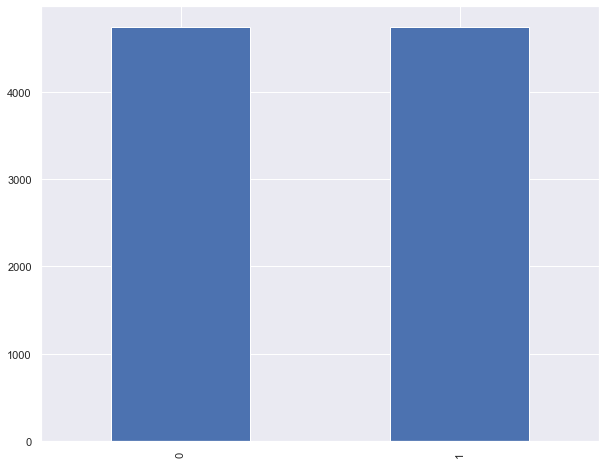

In [37]:
class_count_0, class_count_1 = df.stroke.value_counts()
# Separate class
class_0 = df[df.stroke == 0]
class_1 = df[df.stroke == 1]

print('class 0:', class_0.shape)
print('class 1:', class_1.shape)
    
class_1_over = class_1.sample(class_count_0, replace=True)
df = pd.concat([class_0,class_1_over], axis=0)

print("total values of 1 and 0:",df.stroke.value_counts())

df.stroke.value_counts().plot(kind='bar')
plt.show()

***
# *$$Machine~Learning~Model$$*

In [38]:
from sklearn.model_selection import train_test_split

## *$$Separating~Target~Variables~from~other~features$$*

In [39]:
X = df.drop(columns = ["stroke"])
y = df["stroke"]

## *$$Separating~Target~Variables~from~other~features:$$*

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30,random_state = 100)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6636, 15), (6636,), (2844, 15), (2844,))

## *$$Feature Scaling$$*

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

***

# *$$Decision~Tree$$*

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dtree = DecisionTreeClassifier()

In [45]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [46]:
predictions = dtree.predict(X_test)

In [47]:
from sklearn.metrics import classification_report,confusion_matrix

In [48]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1431
           1       0.95      1.00      0.98      1413

    accuracy                           0.98      2844
   macro avg       0.98      0.98      0.98      2844
weighted avg       0.98      0.98      0.98      2844



In [49]:
print(confusion_matrix(y_test,predictions))

[[1363   68]
 [   0 1413]]


<AxesSubplot:>

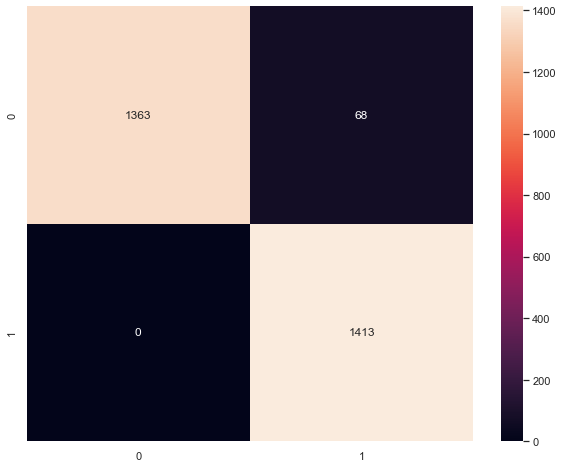

In [50]:
sns.heatmap(confusion_matrix(y_test,predictions), annot = True, fmt = "d")

In [51]:
import pydotplus

In [52]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

# Putting features
features = list(X.columns)
features

['age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'gender_Male',
 'ever_married_Yes',
 'work_type_Never_worked',
 'work_type_Private',
 'work_type_Self-employed',
 'work_type_children',
 'Residence_type_Urban',
 'smoking_status_formerly smoked',
 'smoking_status_never smoked',
 'smoking_status_smokes']

In [53]:
import pydot

In [54]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

**ROC Curve**

In [55]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

[0. 1. 0. ... 1. 0. 1.]


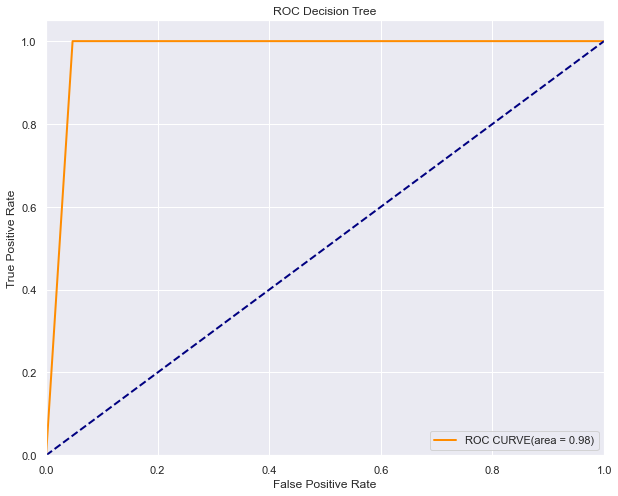

In [81]:
preds_dc = dtree.predict_proba(X_test)[:,1]

print(preds_dc)

preds_dc.shape

fpr_dc, tpr_dc, thresholds_dc = roc_curve(y_test,preds_dc)

fpr_dc

tpr_dc

thresholds_dc

df_dc = pd.DataFrame(dict(fpr = fpr_dc, tpr = tpr_dc))

auc_dc = roc_auc_score(y_test, preds_dc)

auc_dc

plt.figure()
lw =2 
plt.plot(fpr_dc, tpr_dc, color = 'darkorange', lw = lw, label = 'ROC CURVE(area = %0.2f)' % auc_dc)
plt.plot([0,1],[0,1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC Decision Tree')
plt.legend(loc = 'lower right')
plt.show()

***
# *$$Random~Forest$$*

In [57]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [58]:
rfc_pred = rfc.predict(X_test)

In [59]:
print(confusion_matrix(y_test,rfc_pred))

[[1401   30]
 [   0 1413]]


In [60]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1431
           1       0.98      1.00      0.99      1413

    accuracy                           0.99      2844
   macro avg       0.99      0.99      0.99      2844
weighted avg       0.99      0.99      0.99      2844



<AxesSubplot:>

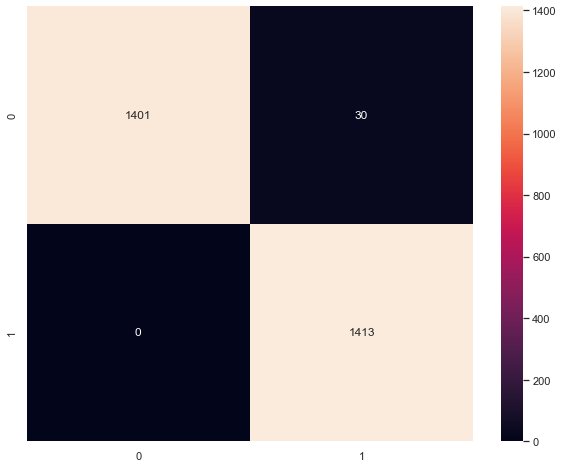

In [61]:
sns.heatmap(confusion_matrix(y_test,rfc_pred), annot = True, fmt = "d")

**ROC Curve**

[0.05 1.   0.27 ... 1.   0.   1.  ]


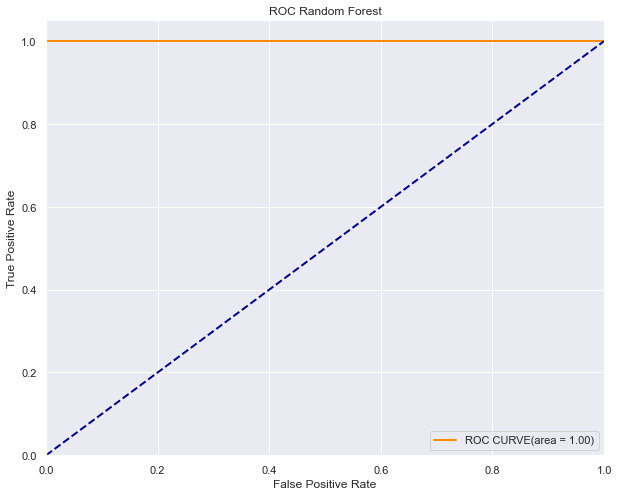

In [82]:
preds_rf = rfc.predict_proba(X_test)[:,1]

print(preds_rf)

preds_rf.shape

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test,preds_rf)

fpr_rf

tpr_rf

thresholds_rf

df_rf = pd.DataFrame(dict(fpr = fpr_rf, tpr = tpr_rf))

auc_rf = roc_auc_score(y_test,preds_rf)

auc_rf

plt.figure()
lw =2 
plt.plot(fpr_rf, tpr_rf, color = 'darkorange', lw = lw, label = 'ROC CURVE(area = %0.2f)' % auc_rf)
plt.plot([0,1],[0,1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC Random Forest')
plt.legend(loc = 'lower right')
plt.show()

***
# *$$Logistic~Regression$$*

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
report = classification_report(y_test, lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.74      0.77      1431
           1       0.76      0.83      0.79      1413

    accuracy                           0.78      2844
   macro avg       0.79      0.78      0.78      2844
weighted avg       0.79      0.78      0.78      2844



In [65]:
print(confusion_matrix(y_test,lr_pred))

[[1060  371]
 [ 245 1168]]


<AxesSubplot:>

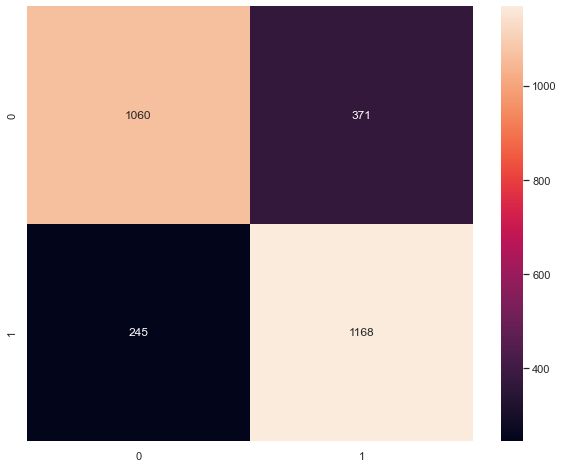

In [66]:
sns.heatmap(confusion_matrix(y_test,lr_pred), annot = True, fmt = "d")

**ROC Curve**

[0.37114144 0.71345294 0.53789303 ... 0.82181322 0.03708751 0.75587869]


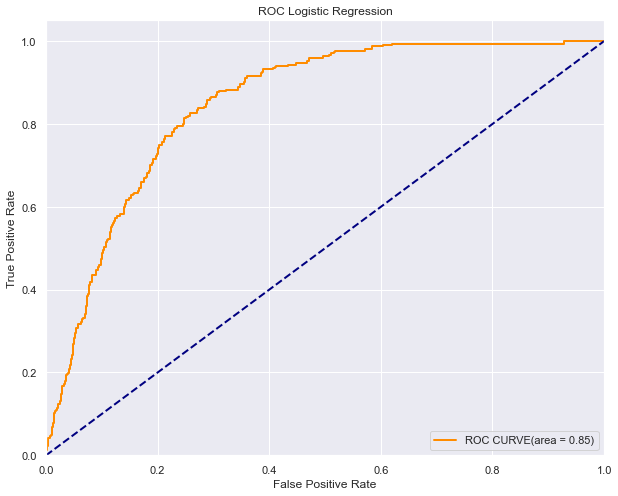

In [83]:
preds_lr = lr.predict_proba(X_test)[:,1]

print(preds_lr)

preds_lr.shape

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test,preds_lr)

fpr_lr

tpr_lr

thresholds_lr

df_lr = pd.DataFrame(dict(fpr = fpr_lr, tpr = tpr_lr))

auc_lr = roc_auc_score(y_test,preds_lr)

auc_lr

plt.figure()
lw =2 
plt.plot(fpr_lr, tpr_lr, color = 'darkorange', lw = lw, label = 'ROC CURVE(area = %0.2f)' % auc_lr)
plt.plot([0,1],[0,1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC Logistic Regression')
plt.legend(loc = 'lower right')
plt.show()

***
# *$$KNN$$*

In [68]:
from scipy import stats
import statsmodels.api as sm
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

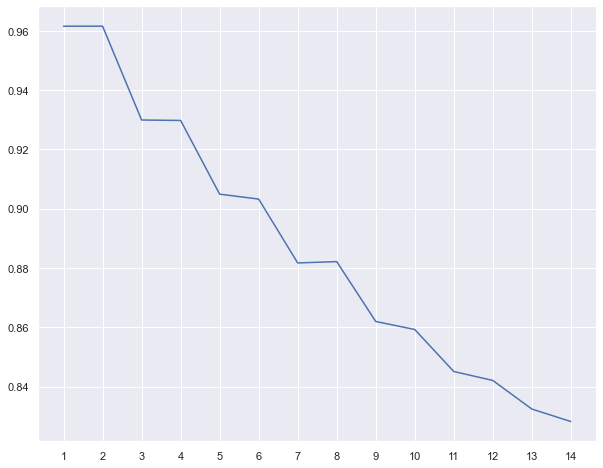

In [70]:
from sklearn.model_selection import cross_val_score
knn_scores=[]
for k in range(1,15):
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,y_train,cv=5)
    knn_scores.append(scores.mean())

x_ticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
x_labels = x_ticks

plt.plot([k for k in range(1,15)],knn_scores)
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.grid(True)
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1431
           1       0.95      1.00      0.97      1413

    accuracy                           0.97      2844
   macro avg       0.97      0.97      0.97      2844
weighted avg       0.97      0.97      0.97      2844



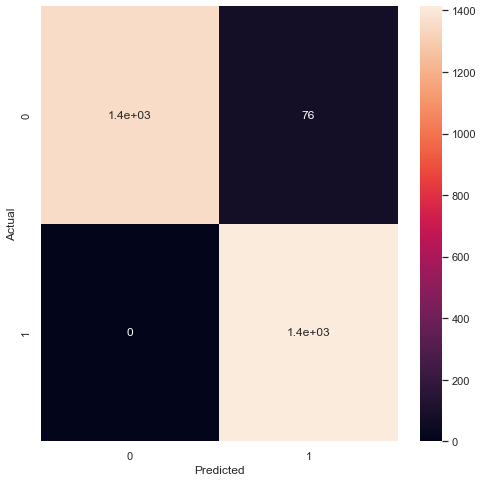

In [71]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix
confusion_knn=confusion_matrix(y_test,knn.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_knn,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
from sklearn.metrics import classification_report
print(classification_report(y_test,knn.predict(X_test)))

**ROC Curve**

[0. 1. 0. ... 1. 0. 1.]


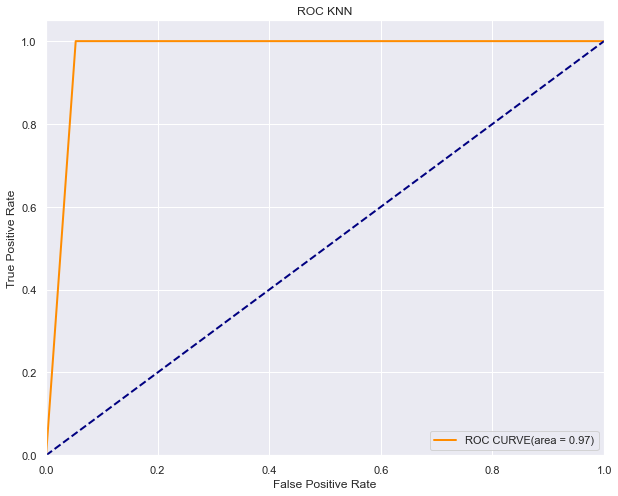

In [84]:
preds_knn1 = knn.predict_proba(X_test)[:,1]

print(preds_knn1)

preds_knn1.shape

fpr_knn1, tpr_knn1, thresholds_knn1 = roc_curve(y_test,preds_knn1)

df_knn1 = pd.DataFrame(dict(fpr = fpr_knn1, tpr = tpr_knn1))

auc_knn1 = roc_auc_score(y_test,preds_knn1)

plt.figure()
lw =2 
plt.plot(fpr_knn1, tpr_knn1, color = 'darkorange', lw = lw, label = 'ROC CURVE(area = %0.2f)' % auc_knn1)
plt.plot([0,1],[0,1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC KNN')
plt.legend(loc = 'lower right')
plt.show()

***
# *$$SVM$$*

In [73]:
svcT = svm.SVC(kernel = 'rbf', C =1, gamma = 10, probability = True). fit(X_train, y_train)

In [74]:
print(svcT)

SVC(C=1, gamma=10, probability=True)


In [75]:
svm_pred = svcT.predict(X_test)

In [76]:
svm_pred.shape

(2844,)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1431
           1       0.99      1.00      1.00      1413

    accuracy                           1.00      2844
   macro avg       1.00      1.00      1.00      2844
weighted avg       1.00      1.00      1.00      2844



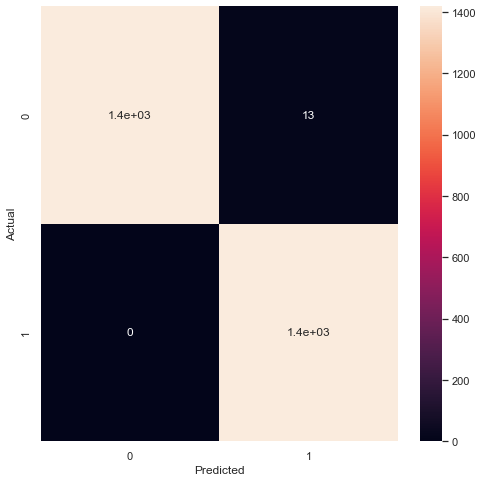

In [77]:
#print(confusion_matrix[y_test,svm_pred])

confusion_svm=confusion_matrix(y_test,svcT.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_svm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
from sklearn.metrics import classification_report
print(classification_report(y_test,svcT.predict(X_test)))

In [78]:
confusion_svm

array([[1418,   13],
       [   0, 1413]], dtype=int64)

***

**ROC Curve**

[1.00000010e-07 9.95692787e-01 1.00000010e-07 ... 9.95716478e-01
 1.00000010e-07 9.95725929e-01]


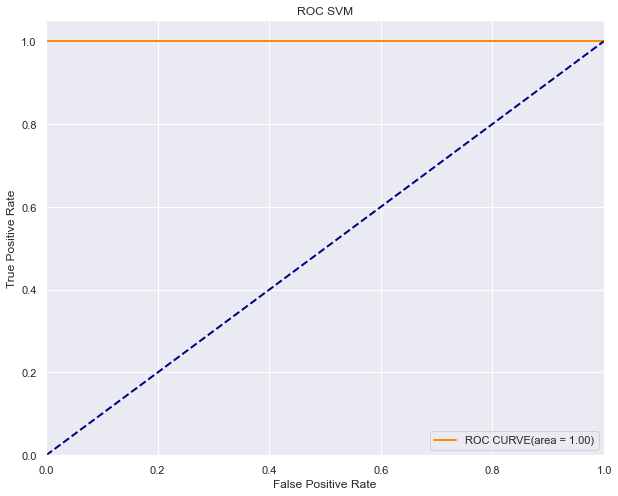

In [85]:
preds1 = svcT.predict_proba(X_test)[:,1]

print(preds1)

preds1.shape

fpr1, tpr1, thresholds1 = roc_curve(y_test,preds1 )

fpr1

tpr1

thresholds1

df1 = pd.DataFrame(dict(fpr = fpr1, tpr = tpr1))

auc = roc_auc_score(y_test, preds1)

auc

plt.figure()
lw =2 
plt.plot(fpr1, tpr1, color = 'darkorange', lw = lw, label = 'ROC CURVE(area = %0.2f)' % auc)
plt.plot([0,1],[0,1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC SVM')
plt.legend(loc = 'lower right')
plt.show()

# $$Accuracy~ Comparison$$

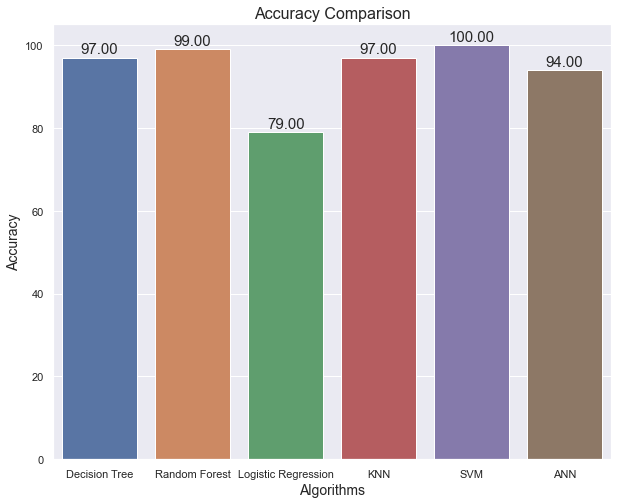

In [80]:
lx = ['Decision Tree','Random Forest','Logistic Regression','KNN','SVM','ANN']
ly = [97,99,79,97,100,94]
plots = sns.barplot(x=lx,y=ly)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
 
# Setting the label for x-axis
plt.xlabel("Algorithms", size=14)
 
# Setting the label for y-axis
plt.ylabel("Accuracy", size=14)
 
# Setting the title for the graph
plt.title("Accuracy Comparison",size=16)
 
# Finally showing the plot
plt.show()

## $$Insight$$
- SVM has the highest accuracy among all the models.
- SVM model doesn't miss-classifies any Stroke Patient as a Non-Stroke patient. We don't want any patient who is suffering from Stroke to be classified as Non-Stroke and not getting the required medical facilities.